In [888]:
import gurobipy as gp
from gurobipy import GRB
import networkx as nx
import numpy as np
import datetime
import time

import random

import math
import pandas as pd
import heapq as hq

In [198]:
import os
print(os.getcwd())

F:\Portfolio\UFL


In [199]:
os.chdir(r'F:/Portfolio/UFL/')

In [200]:
data_path = r"data/M/O/"
filename = 'MO1'

In [201]:
with open(data_path+filename) as file:
    sizes = np.fromstring(file.readline(), dtype=int, sep=" ")
    m, n = sizes[0], sizes[1] # m = no. of customers; n = no. of facilites
    print(m, n)
    capacity = np.empty(n)
    opening_cost = np.empty(n)
    demand = np.empty(m)
    serving_cost = np.empty([m, n])
    for i in range(n):
        section_1_line = np.fromstring(file.readline(), dtype=float, sep=" ")
        capacity[i], opening_cost[i] = section_1_line[0], section_1_line[1]
    for i in range(m):
        demand[i] = np.fromstring(file.readline(), dtype=float, sep=" ")
        serving_cost[i, :] = np.fromstring(file.readline(), dtype=float, sep=" ")

100 100


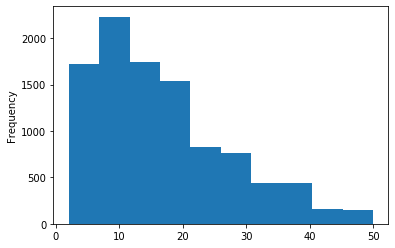

In [202]:
dff = pd.Series(serving_cost.flatten())
dff.plot.hist()

In [203]:
n_client = len(demand)
n_facility = len(opening_cost)
print(n_client, "Demand Locations or Clients")

print(n_facility, "Facilities")

100 Demand Locations or Clients
100 Facilities


In [204]:
opening_cost

array([200.55  , 212.658 ,  95.921 , 117.834 , 171.031 , 256.357 ,
       218.632 , 171.061 , 180.971 , 168.295 , 159.696 , 196.258 ,
       157.606 , 162.212 , 102.261 , 109.421 , 124.012 , 168.598 ,
       105.592 , 168.381 , 131.903 , 190.719 , 116.779 ,  50.    ,
        94.175 , 110.655 , 211.602 , 143.065 , 163.495 , 136.551 ,
        73.6585, 214.622 , 223.719 ,  99.4707, 203.919 , 207.559 ,
        80.861 , 251.72  , 150.969 , 250.894 , 243.853 , 131.426 ,
       241.631 , 149.976 ,  65.3497, 166.159 ,  69.8907, 225.944 ,
       133.146 ,  90.6736, 140.899 , 178.587 , 300.    , 117.857 ,
       182.391 , 137.279 , 159.54  , 129.923 ,  71.5244, 119.644 ,
       133.431 , 230.612 , 133.794 , 190.345 , 158.711 , 152.179 ,
       179.039 , 143.685 , 203.228 , 163.309 , 156.848 , 227.786 ,
       166.931 , 151.377 , 284.253 , 119.007 , 152.611 , 174.067 ,
       197.942 , 154.078 , 238.836 , 214.227 , 269.128 , 104.872 ,
        61.2307, 149.104 , 154.132 , 152.156 , 173.297 , 123.2

In [274]:
df = pd.DataFrame(serving_cost)

df = df.rename_axis("Facilities", axis="columns")
df = df.rename_axis("Clients", axis="rows")


In [275]:
df.head(10)

Facilities,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Clients,,,,,,,,,,,,,,,,,,,,,
0,2.37627,5.31695,5.57118,5.83591,9.15027,5.82114,5.77960,5.67768,4.49169,6.72159,...,6.46666,2.17409,3.42665,4.39220,7.97902,5.49366,5.04129,8.15626,3.59279,4.40500
1,9.45280,3.21590,7.81713,6.76244,8.37225,4.75309,4.95507,5.71846,4.03081,8.64646,...,6.50485,4.65022,7.14090,4.46423,4.46473,5.88768,7.99023,6.40044,3.12517,7.52048
2,17.18240,5.51389,15.24870,10.05870,5.66571,11.18050,4.92069,19.05850,12.24140,4.41981,...,18.32730,13.46990,4.83425,9.93675,6.29434,10.62850,19.63810,8.94523,19.53320,7.04157
3,8.27847,7.92073,8.12976,7.45249,7.86574,4.25142,3.49568,7.83872,3.50782,9.26896,...,6.16701,8.55182,2.00478,7.41689,4.18369,9.23453,8.91085,2.15172,3.20007,8.19683
4,3.99216,5.89499,9.66227,6.38394,6.88412,6.33420,8.17981,2.32795,7.02377,7.42180,...,7.02252,7.86589,4.46928,2.65191,6.82275,2.42109,4.28059,6.75315,2.41353,9.38202
5,25.71220,17.33960,22.92840,27.97390,29.20100,13.43600,29.70420,16.17880,19.77090,12.74470,...,19.06710,25.18980,18.01580,7.63610,19.45870,28.75690,7.78761,22.73110,10.18860,10.86750
6,26.97930,20.58670,7.82801,12.69540,8.69063,20.13180,16.82760,22.38500,8.50509,12.52740,...,17.21960,21.96030,24.46160,15.39770,7.41909,27.77360,19.74140,26.28320,22.69280,10.55900
7,10.75020,16.55460,27.81010,25.42820,16.26130,16.03730,33.16300,16.79670,18.95580,19.59980,...,9.25596,33.48890,12.05020,28.84500,29.83140,36.02330,38.19920,15.47270,36.94960,29.39150
8,11.56260,9.68654,5.78615,16.07650,14.74730,13.45510,17.89360,16.29380,15.30210,5.16640,...,6.04054,10.01700,16.12530,15.65320,19.12560,15.61060,8.91963,7.04095,14.27070,5.30753


In [284]:
df.loc[0,91] # df[client, facility]

2.17409

In [295]:
# for each client get sorted list of warehouse (closest first)
closest_facility_df = df.apply(np.argsort, axis = 1)
closest_facility_df.head(2)

Facilities,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Clients,,,,,,,,,,,,,,,,,,,,,
0,91,62,0,45,54,78,22,80,27,20,...,34,11,4,28,43,82,24,21,40,35
1,13,67,33,76,59,39,81,98,35,1,...,88,0,64,14,16,27,38,32,55,52


### TABU Search
A simple tabu search for warehouse location
Author links open overlay panelLaurentMichelPascalVan Hentenryck

y=〈y1,…,yn〉, where yw is 1 if warehouse w is open and 0 otherwise.

<math><mtext>Open(y)={w∈N∣y</mtext><msub><mi></mi><mn>w</mn></msub><mtext>=1}</mtext></math>
to represent the warehouses that are opened in a state y.

#### Neighborhood
1-OPT neighborhood (set of solutions obtainted by flipping 1 item of y.

<math><mtext>N</mtext><mtext>(y)={flip(y,w)∣w∈W},</mtext></math>

<math><mtext>flip(〈y</mtext><msub><mi></mi><mn>1</mn></msub><mtext>,…,y</mtext><msub><mi></mi><mn>n</mn></msub><mtext>〉,w)=〈y</mtext><msub><mi></mi><mn>1</mn></msub><mtext>,…,y</mtext><msub><mi></mi><mn>w−1</mn></msub><mtext>,!y</mtext><msub><mi></mi><mn>w</mn></msub><mtext>,y</mtext><msub><mi></mi><mn>w+1</mn></msub><mtext>,…,y</mtext><msub><mi></mi><mn>n</mn></msub><mtext>〉.</mtext></math>

#### Tabu search
The tabu-search algorithm uses a tabu-list T which contains the set of warehouses that cannot be flipped. At each iteration, the algorithm considers the set of neighbors which are not tabu and whose gains are maximal. In other words, the set of non-tabu neighbors is defined as

<math><mtext>N</mtext><msup><mi></mi><mn>T</mn></msup><mtext>(y)={flip(y,w)∣w∈W⧹T}.</mtext></math>

In [12]:
# find neighbors for current y
# find best neighbor & best objective
# consider the set of neighbors:
# the neighbors that have the best_objective(y)
# if none of these neighbors degrade the current solution
# randomly select a w and marks it tabu for a number of iterations
# if the neighbors degrade the current solution, the alg performs a diversification
# It randomly selects an open warehouse and closes it

# the following represents the best neighbors & their objectives compactly
# bestFlips(y) = {w | flip(y,w) in best_neighbors}
# bestGain(y) = obj(y) - bestObj(y)

# do iterations
# at each iteration, if the best gain >= 0
# select a warehouse in bestFlips(y) and flip it
# adjust tabu-list

In [ ]:
nbStable = 0
best = obj
S_ = y
tLen = 10
stabilityLimit = 500
while nbStable < stabilityLimit :
    old = obj
    if bestGain(y) >= 0:
        w = random(bestFlips(y));
        y[w] = not(y[w])
        t[w] = it + tLen;
        if obj < old and tLen > 2:
            tLen = tLen - 1;
        if obj >= old and tlen < 10:
            tLen = tLen + 1;
        it = it + 1;
    else:
        w = random(Open(y));
        y[w] = 0;
    
    if obj < best:
        best = obj
        S_ = y
        nbStable = 0
    else:
        nbStable = nbStable + 1

In [819]:
f = opening_cost

In [820]:
initial = np.random.randint(low=0,high=2, size=n_facility)
initial_cost = np.sum(f * initial)
print(initial_cost)

9245.1874


In [821]:
old_in = initial
old_f = f


In [822]:
def openf(solution):
    return np.where(solution)[0]

In [823]:
o = openf(initial)
o

array([ 0,  7,  8,  9, 11, 12, 14, 15, 16, 19, 21, 22, 26, 27, 28, 29, 30,
       34, 35, 36, 37, 38, 40, 41, 43, 44, 45, 48, 49, 51, 52, 54, 55, 58,
       60, 61, 62, 64, 66, 67, 68, 69, 71, 74, 75, 77, 78, 79, 80, 81, 83,
       84, 87, 88, 89, 94, 95, 96], dtype=int64)

In [824]:
# get the closest warehouse for each store in current config
a_0 = [df.iloc[client][o].idxmin() for client in range(n_client)]


In [825]:
# get the top 2 closest warehouses for each store in current config
open_set = set(o)
top2 = []
for client in range(n_client):
    closest_2 = []
    for idx, val in enumerate(closest_facility_df.iloc[client]):
        if val in open_set:
            closest_2.append(val)
        if len(closest_2) == 2:
            break
    top2.append(closest_2)
    #print(closest_2)
    # go to next_client
np.array(top2).shape

(100, 2)

In [1156]:
# for priority queue
# we need a priority queue for each store, where closest warehouse gets higher priority
# lets first have a master reference

# create a list for each store
store_warehouse_priority = np.empty((n_client, n_facility))
#priority = 0
for store in range(n_client):
    for w in closest_facility_df.iloc[0]:
        #priority += 1   # starts with 1
        store_warehouse_priority[store][w] = df.iloc[store][w]
    
#store_p = list(zip(range(n_client), closest_facility_df.iloc[0]))

In [1222]:
# lets create a list of priority queues
# one for each store
# each store heapq takes (priority, warehouse) format
store_pq = [list( zip(store_warehouse_priority[s], range(n_facility)) )  for s in range(n_client)]
for s in range(n_client):
    hq.heapify(store_pq[s])

In [826]:
# store it in 3 arrays of shape (n_client, ) for <closest, closest_cost, 2nd_closest_cost> : a, b, d
a = np.empty(n_client) # closest open facility of each client
b = np.empty(n_client)
d = np.empty(n_client)

a = np.array(top2)[:, 0]
next_a = np.array(top2)[:, 1]

b = np.diag(df[a])   # serving costs of each client from their closest open facility
d = np.diag(df[next_a]) # serving costs of each client from their 2nd closest open facility


In [827]:
if set(np.unique(a)) != open_set:
    print(f"WARNING : Unconnected warehouses {open_set - set(np.unique(a))} are open.")

In [828]:
# create a mapping of warehouse to connected stores
# we attach a store to its closest open facility as this would give
# the minimum serving cost for a given configuration
# naming may confuse : here warehouse[0] contains the stores that are connected to it
warehouse = {}
for w in open_set:
    warehouse[w] = []
    
for client in range(n_client):
    closest_w = a[client]
    warehouse[closest_w].append(client)

# Note: there may be warehouses that are not connected to any store at all
# Should we handle it??? lets decide later
#print(warehouse)

In [829]:
def closingBenefit(w, b, d):
    #assumes w is open
    con_stores = warehouse[w]
    old_serving_costs = b[con_stores]
    new_serving_costs = d[warehouse[con_stores]] # because, once u close a w, 
                                                 # those stores automatically gets 
                                                 # connected to the next closest w
    serving_cost_increase = sum(new_serving_costs - old_serving_costs)
    g_minus = f[w] - serving_cost_increase
    return g_minus

In [835]:
# use only for initial compute
def obj(solution, a, f):
    total_f = np.sum(f * solution)
    total_c = 0
    for client in range(n_client):
        assert df.iloc[client, a[client]] > 0
        total_c += df.iloc[client, a[client]]

    return total_f + total_c

In [837]:
obj(initial, a, f)

9841.27704

In [838]:
a0, b0, d0 = a.copy(), b.copy(), d.copy()
a1, b1, d1 = a.copy(), b.copy(), d.copy()


In [839]:
g_minus0 = np.zeros(n_facility)
g_minus1 = np.zeros(n_facility)
g_plus = np.zeros(n_facility)
#g_plus1 = np.zeros(n_facility)

In [847]:
# for warehouses where (a0 != a1) or (b0 != b1) or (d0 != d1)
# update g_minus0 and g_minus1

condition = np.where( (a0 != a1) | (b0 != b1) | (d0 != d1) ) # returns indices (ie., stores)
g_minus0[condition] += b0[condition] - d0[condition]
g_minus1[condition] -= b1[condition] - d1[condition]

In [ ]:
condition1 = np.where ( (b1 <= b0) )
# warehouses where c_ws < b1[s]
g_plus[condition1] -=  

In [848]:
b0[condition]

array([], dtype=float64)

In [698]:
np.where( (a0 != a1) | (b0 != b1) | (d0 != d1) )

(array([1], dtype=int64),)

In [ ]:
class Solution:
    def __init__(self, y_arr, a, b, d, obj, warehouse, store_warehouse_priority, n_client):
        self.sol = y_arr
        self.a = a   # closest open warehouse for each client
        self.b = b   # cost of closest warehouse
        self.d = d   # 2nd best cost to open warehouse for each client
        self.obj = obj
        self.warehouse = warehouse
        self.pq = []
        make_heaps(self.y_arr, store_warehouse_priority)
        self.n_client = n_client
        
    def flip(self, w):
        if self.sol[w] == 0:
            action = "open"
            g_plus = -f[w]
            stores = range(n_client)
            for s in stores:
                b0[s], a0[s] = hq.heappop(self.pq[s])
                g_plus += max(0, b - df.iloc[s, w])
                hq.heappush((b0[s], a0[s]))
        else:
            action = 'close':
            stores = self.warehouse[w]   # stores that are attached to the closing warehouse
            # for each of these stores, now find the best open warehouse
            g_minus = f[w]
            for s in stores:
                b0[s], a0[s] = hq.heappop(self.pq[s])
                d0[s], c2 = hq.heappop(self.pq[s])
                hq.heappush((d0[s], c2))
                hq.heappush((b0[s], a0[s]))
                g_minus -= (d0[s] - b0[s])
                
        new_sol = self.sol.copy()
        new_sol[w] =  int(not new_sol[w])
        return new_sol
                
    def make_heaps(self, y_arr, store_warehouse_priority):
        open_set = np.where(y_arr[0])
        for s in range(self.n_client):
            li = []
            for w in open_set:
                priority = store_warehouse_priority[s][w]
                li.append((priority, w))
            hq.heapify(li)
            self.pq.append(li)
        
    def search_neighborhood(self, T):
        # T = tabu-list (dictionary of warehouse to tabu_counter)
        for w in range(len(self.sol)):
            if w not in T:
                neighbor = flip(w)
        

In [857]:
s = {1:2, 2:4, 8:9}

In [858]:
s

{1: 2, 2: 4, 8: 9}

TypeError: unhashable type: 'list'